In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_saturacion_DO(temperature, salinidad):
    x, y = temperature, salinidad
    var = np.array([x, y, x*y, x*y**2, x**2, y**2, y*x**2, x**4])
    coef = np.array([-3.6990e-01, -9.4454e-02,  2.5591e-03, -3.4891e-06, 4.9856e-03,  2.1292e-04, -2.5916e-05, -5.2018e-07])
    bias = 14.5176
    saturacion = (var*coef).sum() + bias
    return saturacion

In [3]:
df = pd.read_csv('data/data1.csv')
df['week2'] = df['days']//7
df.head()

,pool_id,cycle,date,surface(ha),days,week,surviving,density(shrimp),density(shrimp/ha),weight(g),growth,biomass(kg),biomass(kg/ha),food(kg),food(kg/ha),type_feeding,Medicion,Alimento acumulado [Kg],FCA,week2
0,4,2020,2020-07-01,4.9,0,0.000000,1.00,998000.0,203673.469388,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0
1,4,2020,2020-07-02,4.9,1,0.142857,0.98,978040.0,199600.000000,0.15,0.00,146.7060,29.940000,37.5,7.653061224489796,Boleo,NaN,37.5,375.000000,0
2,4,2020,2020-07-03,4.9,2,0.285714,0.97,968060.0,197563.265306,0.18,0.03,174.2508,35.561388,40.0,8.16326530612245,Boleo,NaN,77.5,2.803421,0
3,4,2020,2020-07-04,4.9,3,0.428571,0.96,958080.0,195526.530612,0.24,0.06,229.9392,46.926367,40.0,8.16326530612245,Boleo,NaN,117.5,1.410002,0
4,4,2020,2020-07-05,4.9,4,0.571429,0.95,948100.0,193489.795918,0.30,0.06,284.4300,58.046939,50.0,10.204081632653061,Boleo,NaN,167.5,1.215318,0


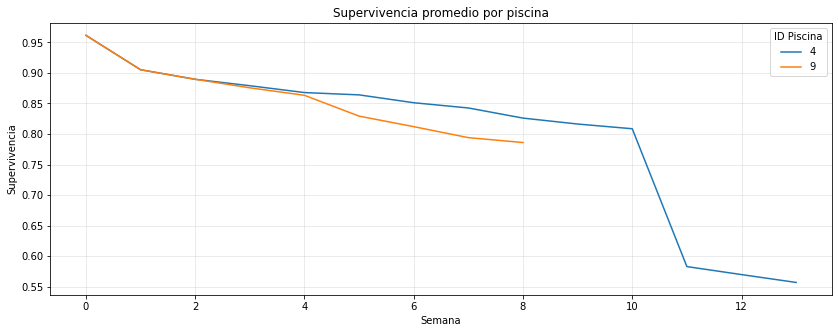

In [24]:
#6. Obtener el promedio de supervivencia por semana y por piscinas y graficar
df_mean_sup = df.groupby(['pool_id','week2'], as_index=False)['surviving'].mean()
df_mean_sup = df_mean_sup.set_index('week2')
df_mean_sup.groupby('pool_id')['surviving'].plot(figsize=(14,5))

plt.xlabel('Semana')
plt.ylabel('Supervivencia')
title = 'Supervivencia promedio por piscina'
plt.title(title)
plt.grid(alpha=.3)
plt.legend(title='ID Piscina')
plt.xticks(np.arange(0, df_mean_sup.index.max() +1 ))
plt.savefig(title+'.png')
plt.show()

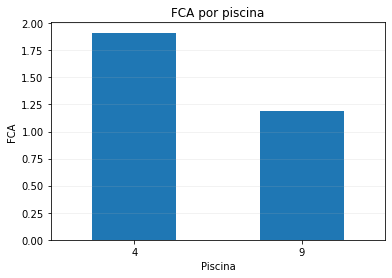

In [5]:
#7. Hacer un grafico del FCA final con ejes en español
df_fca = df.groupby('pool_id')['FCA'].last()
df_fca.plot(kind='bar')

plt.xlabel('Piscina')
plt.ylabel('FCA')
title = 'FCA por piscina'
plt.title(title)
plt.xticks(rotation=0)
plt.grid(alpha=.2, axis='y')
plt.savefig(title+'.png')
plt.show()

In [6]:
#8. Calcular el crecimiento semanal y graficar (Crecimiento = Peso_final-Peso_inicial)
#forma 1
df_crec_sem = df.groupby(['pool_id','week2'])['weight(g)'].agg(['last','first'])
df_crec_sem['Crecimiento'] = df_crec_sem['last'] - df_crec_sem['first']
df_crec_sem

last  first  Crecimiento
pool_id week2                            
4       0       0.500   0.15        0.350
        1       1.230   0.64        0.590
        2       2.520   1.39        1.130
        3       3.670   2.92        0.750
        4       5.410   3.95        1.460
        5       7.450   5.79        1.660
        6       9.460   7.70        1.760
        7      11.200   9.73        1.470
        8      13.530  11.50        2.030
        9      15.300  13.76        1.540
        10     17.550  15.60        1.950
        11     18.666  17.80        0.866
        12     21.330  18.83        2.500
        13     22.000  21.66        0.340
9       0       0.860   0.30        0.560
        1       2.230   0.91        1.320
        2       3.710   2.60        1.110
        3       5.590   3.90        1.690
        4       7.750   5.85        1.900
        5       9.700   8.08        1.620
        6      11.650   9.90        1.750
        7      14.240  11.83        2.410
        8      14.370  14.37        0.000

In [7]:
#Forma 2 con funcones lamnda
df_crec_sem_2 = df.groupby(['pool_id','week2'], as_index=False)['weight(g)'].agg(lambda x: x.max()-x.min())
df_crec_sem_2.rename(columns={'weight(g)':'Crecimiento'}, inplace=True)
df_crec_sem_2.set_index('week2', inplace=True)

df_crec_sem_2

,pool_id,Crecimiento
week2,,
0,4,0.350
1,4,0.590
2,4,1.130
3,4,0.750
4,4,1.460
5,4,1.660
6,4,1.760
7,4,1.470
8,4,2.030


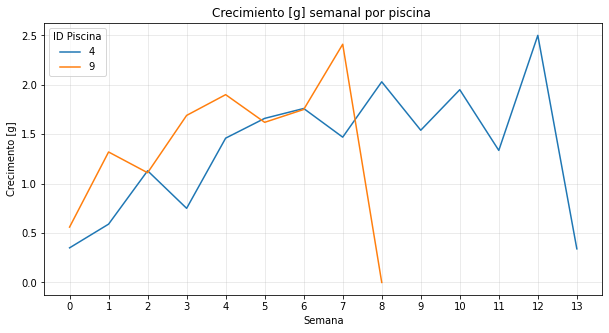

In [8]:
df_crec_sem_2.groupby('pool_id')['Crecimiento'].plot(figsize=(10,5))

plt.xlabel('Semana')
plt.ylabel('Crecimento [g]')
title = 'Crecimiento [g] semanal por piscina '
plt.title(title)
plt.grid(alpha=.3)
plt.legend(title='ID Piscina')
plt.xticks(np.arange(0, df_crec_sem_2.index.max() +1 ))
plt.savefig(title+'.png')
plt.show()

In [9]:
#9. Calcular la temp media, min y max y graficar
temp = pd.read_pickle('data/temp.pkl')
temp.head()

,value,hour,minute,day,mes
time,,,,,
2020-08-03 10:13:44,25.19,10,13,3,8
2020-08-03 10:29:10,25.21,10,29,3,8
2020-08-03 10:44:35,25.19,10,44,3,8
2020-08-03 10:59:50,25.39,10,59,3,8
2020-08-03 11:14:55,25.48,11,14,3,8


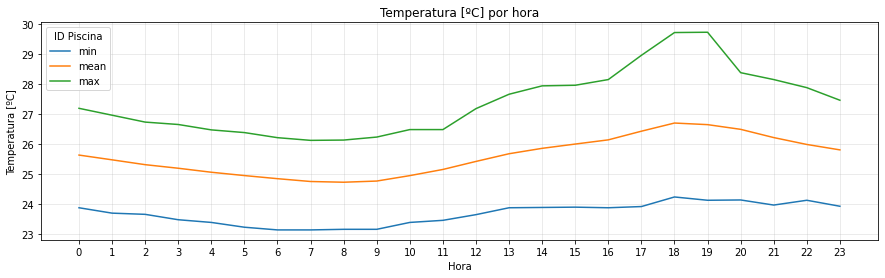

In [10]:
temp_per_hour = temp.groupby('hour')['value'].agg(['min','mean','max'])
temp_per_hour.plot(figsize=(15,4))

plt.xlabel('Hora')
plt.ylabel('Temperatura [ºC]')
title = 'Temperatura [ºC] por hora'
plt.title(title)
plt.grid(alpha=.3)
plt.legend(title='ID Piscina')
plt.xticks(np.arange(0,24))
plt.savefig(title+'.png')
plt.show()

In [11]:
#10. Calcular la concentracion de oxigeno y graficar un boxplot por hora (DO/saturacion)

# obtener la saturacion de DO
temp['saturacion DO'] = temp['value'].apply(lambda x: get_saturacion_DO(x,5))
temp.sample(5)

,value,hour,minute,day,mes,saturacion DO
time,,,,,,
2020-10-12 13:57:38,26.94,13,57,12,10,7.678235
2020-08-23 18:21:06,24.44,18,21,23,8,8.035862
2020-08-30 10:11:21,24.90,10,11,30,8,7.967396
2020-09-12 11:54:38,25.95,11,54,12,9,7.815697
2020-08-24 20:45:46,24.94,20,45,24,8,7.961502


In [12]:
do = pd.read_pickle('data/do.pkl')
do.head()

,value,hour,minute,day,mes
time,,,,,
2020-08-03 10:13:40,2.88,10,13,3,8
2020-08-03 10:29:05,3.52,10,29,3,8
2020-08-03 10:44:30,3.68,10,44,3,8
2020-08-03 11:00:03,5.32,11,0,3,8
2020-08-03 11:15:26,5.68,11,15,3,8


In [13]:
#Los sensores toman mediciones cada 15 minutos
#las mediciones de temp y do no estan sincronizadas
# para unir estos datos, una opcion es obtener el cuarto de hora 

temp['cuarto_hora'] = temp['minute']//15
do['cuarto_hora'] = do['minute']//15

In [14]:
do.head()

,value,hour,minute,day,mes,cuarto_hora
time,,,,,,
2020-08-03 10:13:40,2.88,10,13,3,8,0
2020-08-03 10:29:05,3.52,10,29,3,8,1
2020-08-03 10:44:30,3.68,10,44,3,8,2
2020-08-03 11:00:03,5.32,11,0,3,8,0
2020-08-03 11:15:26,5.68,11,15,3,8,1


In [26]:
#Se procede a la uniion
df_ambiental = pd.merge(do, temp, on=['cuarto_hora','hour','day','mes'], suffixes=('_DO', '_Temp'))
df_ambiental.head()

,value_DO,hour,minute_DO,day,mes,cuarto_hora,value_Temp,minute_Temp,saturacion DO
0,2.88,10,13,3,8,0,25.19,13,7.924870
1,3.52,10,29,3,8,1,25.21,29,7.921955
2,3.68,10,44,3,8,2,25.19,44,7.924870
3,5.32,11,0,3,8,0,25.48,14,7.882828
4,4.35,14,25,3,8,1,25.66,25,7.856972


In [16]:
df_ambiental['Concentracion DO'] = df_ambiental['value_DO'] / df_ambiental['saturacion DO']
df_ambiental.head()

,value_DO,hour,minute_DO,day,mes,cuarto_hora,value_Temp,minute_Temp,saturacion DO,Concentracion DO
0,2.88,10,13,3,8,0,25.19,13,7.924870,0.363413
1,3.52,10,29,3,8,1,25.21,29,7.921955,0.444335
2,3.68,10,44,3,8,2,25.19,44,7.924870,0.464361
3,5.32,11,0,3,8,0,25.48,14,7.882828,0.674885
4,4.35,14,25,3,8,1,25.66,25,7.856972,0.553648


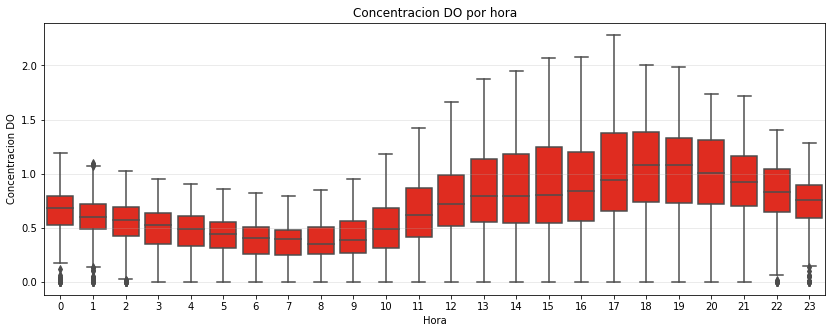

In [23]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df_ambiental, x='hour',y='Concentracion DO', color='#ff1000')

plt.xlabel('Hora')
plt.ylabel('Concentracion DO')
title = 'Concentracion DO por hora'
plt.title(title)
plt.grid(axis='y', alpha=.3)
plt.savefig(title+'.png')
plt.show()